In [3]:
import numpy as np
import tensorflow as tf
import pandas as pd

In [4]:
%run trainingUtils.ipynb
%run utils.ipynb

In [5]:
csv_fp='image_labels.csv'

# Data Preprocessing

In [6]:
def preprocess_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [128, 128])
    image = image / 255.0
    image = tf.image.random_flip_left_right(image)  # Random horizontal flip
    image = tf.image.random_brightness(image, max_delta=0.1)  # Random brightness
    mean = tf.reduce_mean(image)
    std = tf.math.reduce_std(image)
    image = (image - mean) / std
    return image


In [7]:
def augment_image(image):
    image = tf.image.random_flip_left_right(image)  # Randomly flip images horizontally
    image = tf.image.random_flip_up_down(image)     # Randomly flip images vertically
    image = tf.image.random_brightness(image, max_delta=0.1)  # Randomly adjust brightness
    image = tf.image.random_contrast(image, lower=0.9, upper=1.1)  # Randomly adjust contrast
    image = tf.image.random_saturation(image, lower=0.9, upper=1.1)  # Randomly adjust saturation
    image = tf.image.random_hue(image, max_delta=0.02)  # Randomly adjust hue
    return image


In [8]:
def preprocess_and_augment(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [128, 128])
    image = image / 255.0  # Normalize to [0, 1]
    image = augment_image(image)  # Apply data augmentation
    return image

# Load data and preprocess images

In [9]:
def load_data():
    data = pd.read_csv(csv_fp)
    
    # Preprocess images and load labels
    images = [preprocess_image(path) for path in data['file_path']]
    labels = data['is_sepia'].values
    images = np.stack([preprocess_and_augment(path) for path in data['file_path']], axis=0)
    labels = data['is_sepia'].values.astype(np.float32)

    return images, labels
    return np.array(images), np.array(labels)

In [10]:
inputs,outputs=load_data()
print(inputs[0:3])
print(outputs[0:3])

[[[[0.0037165  0.00346686 0.00309762]
   [0.0037165  0.00346686 0.00309762]
   [0.0037165  0.00346686 0.00309762]
   ...
   [0.0037165  0.00346686 0.00309762]
   [0.0037165  0.00346686 0.00309762]
   [0.0037165  0.00346686 0.00309762]]

  [[0.0037165  0.00346686 0.00309762]
   [0.0037165  0.00346686 0.00309762]
   [0.0037165  0.00346686 0.00309762]
   ...
   [0.0037165  0.00346686 0.00309762]
   [0.0037165  0.00346686 0.00309762]
   [0.0037165  0.00346686 0.00309762]]

  [[0.0037165  0.00346686 0.00309762]
   [0.0037165  0.00346686 0.00309762]
   [0.0037165  0.00346686 0.00309762]
   ...
   [0.0037165  0.00346686 0.00309762]
   [0.0037165  0.00346686 0.00309762]
   [0.0037165  0.00346686 0.00309762]]

  ...

  [[0.0037165  0.00346686 0.00309762]
   [0.0037165  0.00346686 0.00309762]
   [0.0037165  0.00346686 0.00309762]
   ...
   [0.0037165  0.00346686 0.00309762]
   [0.0037165  0.00346686 0.00309762]
   [0.0037165  0.00346686 0.00309762]]

  [[0.0037165  0.00346686 0.00309762]
   [0.0

In [11]:
train_inputs, train_outputs, test_inputs,test_outputs = splitData(inputs, outputs)
print(len(train_inputs))
print(train_inputs[0])
print(train_outputs)


72
[[[0.7743124  0.7054697  0.5237427 ]
  [0.78960943 0.7171099  0.5456864 ]
  [0.89282864 0.8290708  0.616622  ]
  ...
  [0.9397575  0.9521469  0.74791026]
  [0.93957484 0.9516959  0.7445644 ]
  [0.9293059  0.9160999  0.70532274]]

 [[0.8286127  0.75977004 0.578043  ]
  [0.74699235 0.6744928  0.5030692 ]
  [0.88769585 0.823938   0.61148924]
  ...
  [0.9264849  0.9521469  0.7397485 ]
  [0.93169475 0.9434427  0.7348423 ]
  [0.9416179  0.948213   0.73707974]]

 [[0.9394703  0.8680222  0.6752272 ]
  [0.8841021  0.81080604 0.61969036]
  [0.9083482  0.83646995 0.6425863 ]
  ...
  [0.9296844  0.9498111  0.73770016]
  [0.9181019  0.9346252  0.7236956 ]
  [0.9310106  0.9475339  0.7366043 ]]

 ...

 [[0.9366568  0.9454767  0.7366858 ]
  [0.9195561  0.90635014 0.6955729 ]
  [0.9466052  0.91636795 0.7121885 ]
  ...
  [0.930313   0.87692714 0.66944706]
  [0.94033384 0.8869481  0.6794679 ]
  [0.9488945  0.8982142  0.6908771 ]]

 [[0.9342979  0.9474045  0.7288787 ]
  [0.94762444 0.9480127  0.7263459

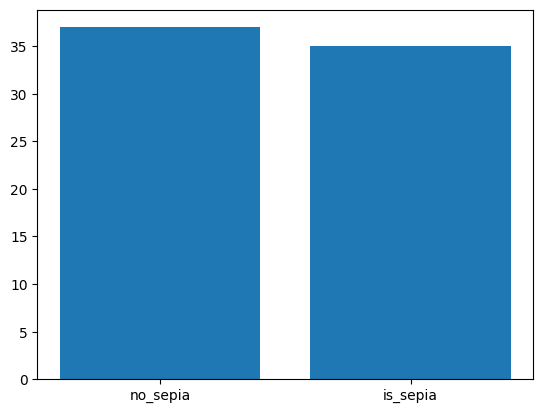

In [12]:
plotTrainingDataDistribution(train_inputs,train_outputs,['is_sepia'],['no_sepia','is_sepia'])

In [13]:
# plotDataDistribution(inputs,outputs,['no_sepia','is_sepia'],'Sepia Dataset')

In [14]:
def evaluate_model(train_inputs,train_outputs,test_inputs,test_outputs,predictedLabels):
    print(test_outputs)
    print(predictedLabels)
    acc,precision,recall,confMatrix=evalMultiClass(np.array(test_outputs),predictedLabels,['no_sepia','sepia'])
    # acc,precision,recall,confMatrix=evaluate(test_outputs, predictedLabels, ['no_sepia','sepia'])
    print('Confusion Matrix: ',confMatrix)
    plotConfusionMatrix(confMatrix,['no_sepia','sepia'],'Sepia Dataset')
    print('Accuracy: ',acc)
    print('Precision: ',precision)
    print('Recall: ',recall)
    plotImagesAndPredictions(test_inputs, test_outputs, predictedLabels,n=int(np.round(len(test_outputs)/3)),m=3,figsize=(10,10))

In [57]:
%run CNN.ipynb

In [16]:
predictedLabels=with_MyCNN(train_inputs,train_outputs,test_inputs,test_outputs)

(72, 128, 128, 3) (72,) (18, 128, 128, 3) (18,)
(72, 128, 128, 3) (72,) (18, 128, 128, 3) (18,)
Epoch  0  loss =  3.095986422847274 
Epoch  1  loss =  3.09600430591619 
Epoch  2  loss =  3.0960221880639076 
Epoch  3  loss =  3.096040069290715 
Epoch  4  loss =  3.0960579495969194 
Epoch  5  loss =  3.0960758289829067 
Epoch  6  loss =  3.096093707449027 
Epoch  7  loss =  3.096111584995556 
Epoch  8  loss =  3.096129461622777 
Epoch  9  loss =  3.09614733733108 


[1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0]
[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]
Confusion Matrix:  [[1 7]
 [1 9]]


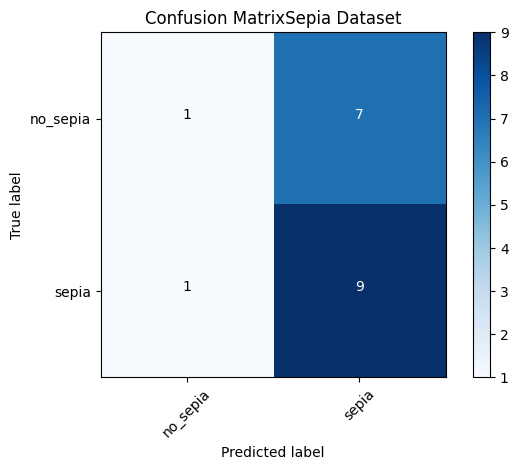

Accuracy:  0.5555555555555556
Precision:  {'no_sepia': 0.5, 'sepia': 0.5625}
Recall:  {'no_sepia': 0.125, 'sepia': 0.9}


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

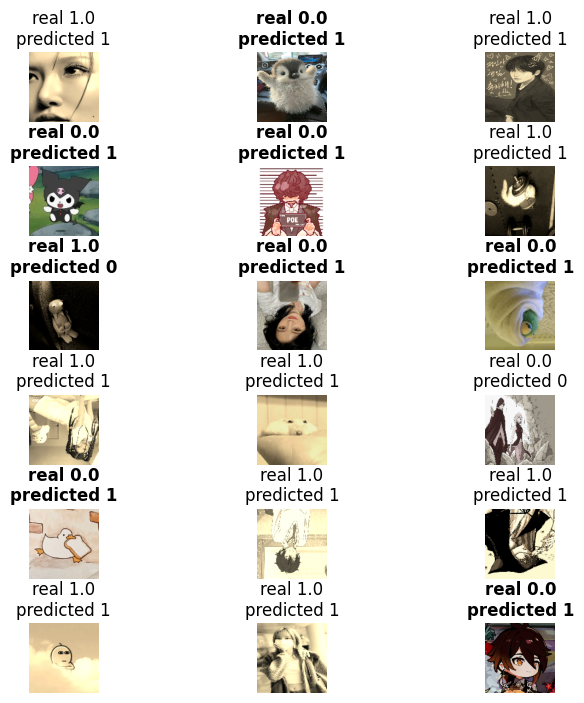

In [17]:
evaluate_model(train_inputs,train_outputs,test_inputs,test_outputs,predictedLabels)